<a href="https://colab.research.google.com/github/saxonyanders/saxonyanders/blob/main/Iraq_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iraq_pop_df = pd.read_csv('/content/IRAQ_GOV_GENDER_AGE(aggregated_years_total) (3).csv')

iraq_pop_df

,Unnamed: 0,Population years,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,gov_code,1997.0,2009.0,2018.0,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,anbar,1023736.0,1483359.0,1771656.0,1914165.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,basra,1556445.0,2405434.0,2908491.0,3142449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,muthanna,436825.0,683126.0,814371.0,879874.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,najaf,775042.0,1221228.0,1471592.0,1589961.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def process_all_governorates(iraq_pop_df):
    """
    Process all governorates and create a comprehensive dataset
    """
    all_data = []

    # Extract years from the first row and create a mapping from year to column index
    year_to_col_index = {}
    # Start from the second column (index 1)
    for i, col_value in enumerate(iraq_pop_df.iloc[0, 1:].tolist()):
        if pd.notna(col_value):
            try:
                year = str(int(col_value))
                if year.isdigit():
                    # Add 1 to the index because we started iterating from the second column
                    year_to_col_index[year] = i + 1
            except (ValueError, TypeError):
                continue

    years = list(year_to_col_index.keys())

    print(f"Extracted years and column mapping: {year_to_col_index}")

    # Get all unique governorate names (excluding NaN and the header)
    # We start from the second row to avoid the header row
    governorates_data = iraq_pop_df.iloc[1:].dropna(subset=['Unnamed: 0'])

    print(f"Governorates data shape after dropping NaNs: {governorates_data.shape}")
    print(f"Sample of governorates_data:\n{governorates_data.head()}")

    # Iterate through each governorate row
    for index, row in governorates_data.iterrows():
        gov = row['Unnamed: 0']
        # print(f"Processing governorate: {gov}") # Keep this for debugging if needed
        # Extract population data for the current governorate using the column indices
        population_data = []
        for year in years:
            col_index = year_to_col_index.get(year)
            if col_index is not None:
                population = row.iloc[col_index]
                population_data.append(population)
            else:
                population_data.append(None) # Append None if column index not found for a year


        # print(f"Population data for {gov}: {population_data}") # Keep this for debugging if needed

        # Ensure the number of years and population data points match
        if len(years) == len(population_data):
            for i, year_str in enumerate(years):
                population = population_data[i]
                # Convert population to numeric, handling potential commas and errors
                try:
                    population = float(str(population).replace(',', ''))
                except (ValueError, TypeError):
                    population = None # Set to None or NaN if conversion fails

                if population is not None:
                     all_data.append({
                        'Governorate': str(gov).title(),
                        'Year': int(year_str),
                        'Population': population
                    })
        else:
            print(f"Warning: Year and population data mismatch for governorate: {gov}. Expected {len(years)} data points, but found {len(population_data)}. Skipping or partially processing.")


    return pd.DataFrame(all_data)

# Call the function and see the results
iraq_population_clean = process_all_governorates(iraq_pop_df)
iraq_population_clean

Extracted years and column mapping: {'1997': 1, '2009': 2, '2018': 3, '2021': 4}
Governorates data shape after dropping NaNs: (18, 67)
Sample of governorates_data:
  Unnamed: 0  Population years  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
1      anbar         1023736.0   1483359.0   1771656.0   1914165.0   
2      basra         1556445.0   2405434.0   2908491.0   3142449.0   
3   muthanna          436825.0    683126.0    814371.0    879874.0   
4      najaf          775042.0   1221228.0   1471592.0   1589961.0   
5  qadissiya          751331.0   1077614.0   1291048.0   1394885.0   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   
5         NaN         NaN         NaN         NaN         NaN  ..

,Governorate,Year,Population
0,Anbar,1997,1023736.0
1,Anbar,2009,1483359.0
2,Anbar,2018,1771656.0
3,Anbar,2021,1914165.0
4,Basra,1997,1556445.0
...,...,...,...
67,Salah_Al_Din,2021,1723546.0
68,Wassit,1997,783614.0
69,Wassit,2009,1150079.0
70,Wassit,2018,1378723.0


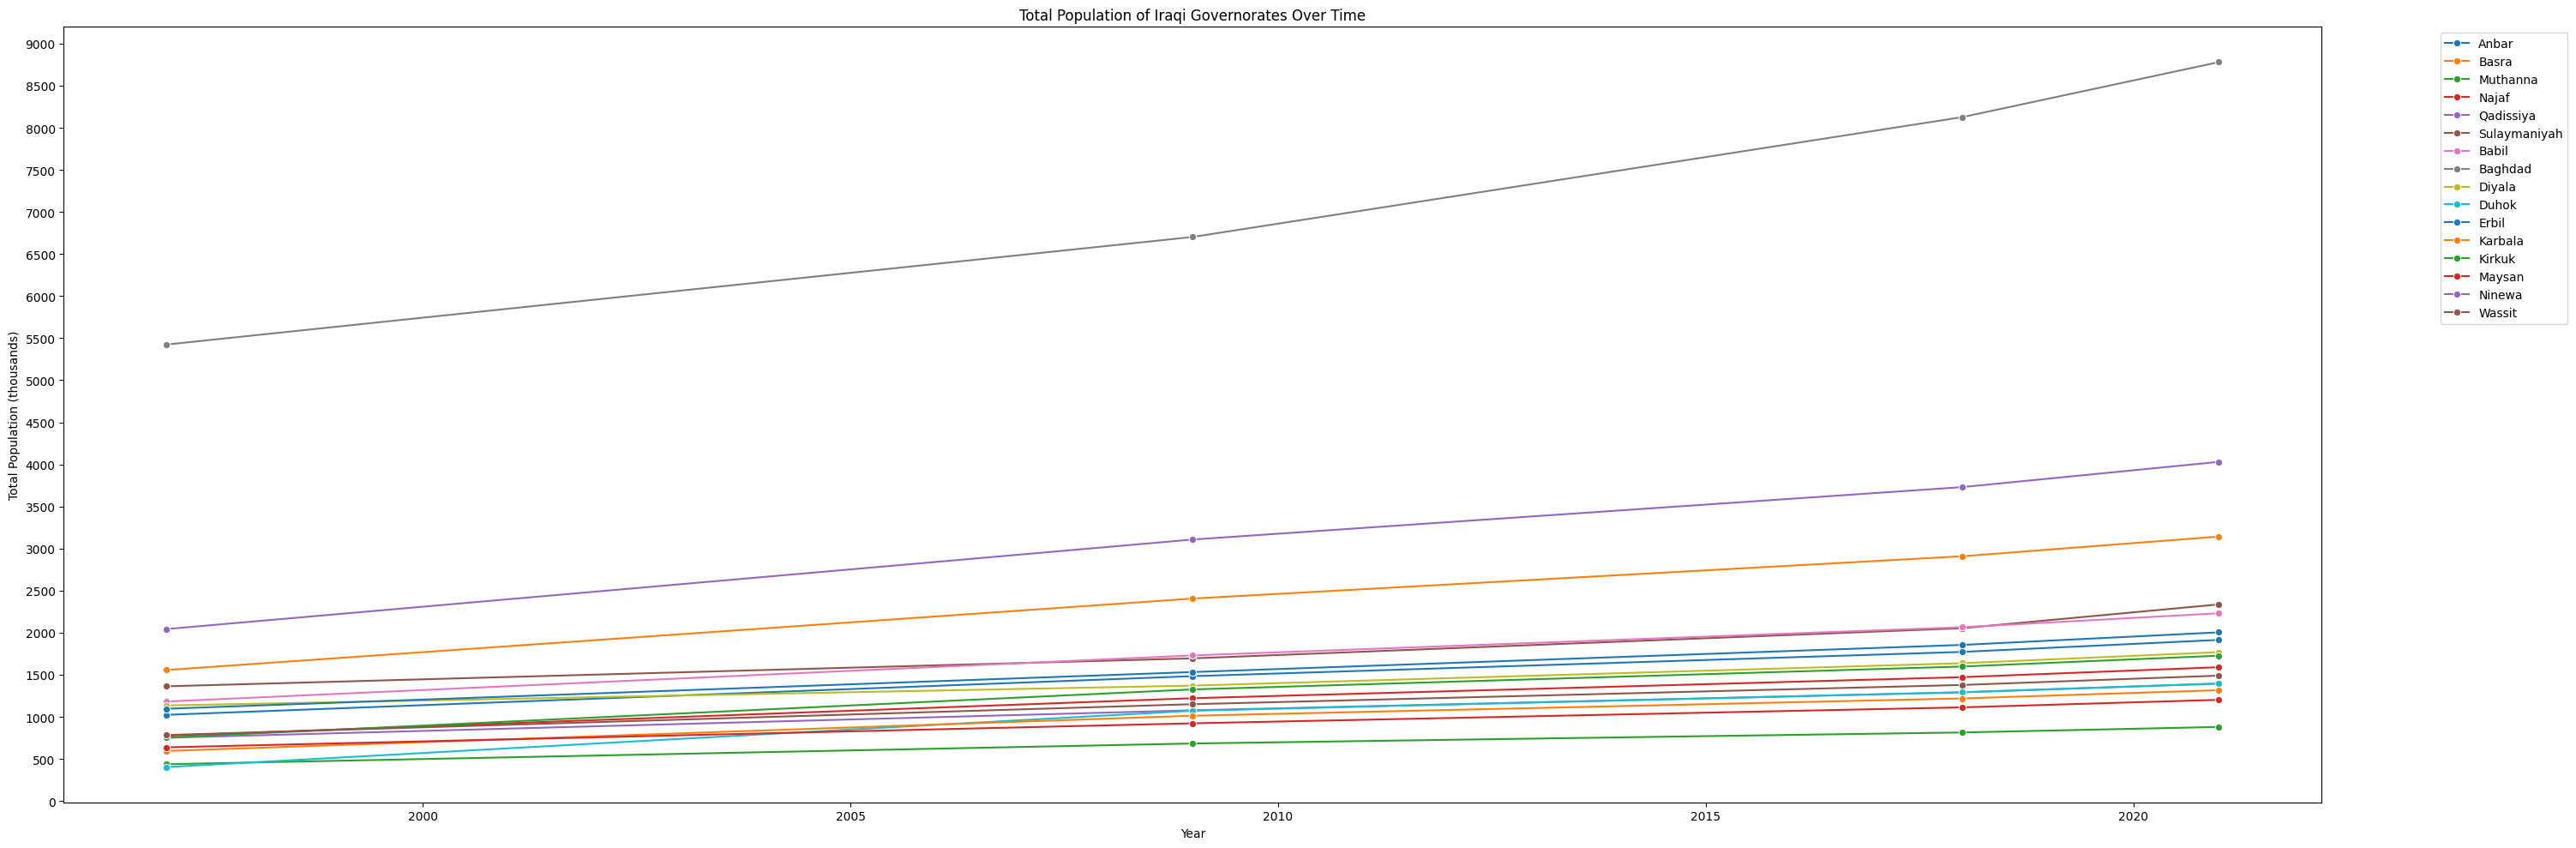

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 10))

governorates_to_plot = ['Anbar', 'Basra', 'Muthanna', 'Najaf', 'Qadissiya',
                       'Sulaymaniyah', 'Babil', 'Baghdad', 'Dhi Qar', 'Diyala',
                       'Duhok', 'Erbil', 'Karbala', 'Kirkuk', 'Maysan',
                       'Ninewa', 'Salah Al Din', 'Wassit']

for gov in governorates_to_plot:
    gov_data = iraq_population_clean[iraq_population_clean['Governorate'] == gov]
    if not gov_data.empty:
        sns.lineplot(
            data=gov_data,
            x='Year',
            y='Population',
            ax=ax,
            label=gov,
            marker='o'
        )

ax.set_title('Total Population of Iraqi Governorates Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Total Population (thousands)')

# Format y-axis to show population in thousands for readability
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))

# Set y-axis major locator to have more indicators, e.g., every 500,000
ax.yaxis.set_major_locator(mticker.MultipleLocator(500000))


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()